In [1]:
import pandas as pd

In [59]:
inventory = pd.read_csv('movie_inventory1.csv', engine = 'python')
inventory.head()

,Unnamed: 0,item_id,contract_year,movie_id,title,price,release_year,release_date,runtime,mpa_rating,...,director,Genre_1,Genre_2,Genre_3,actor_1,actor_2,actor_3,contract_price,studio_score,price_class
0,0,I-1001,2015,tt0121766,Star Wars: Episode III - Revenge of the Sith,5500.0,2005,05-19-2005,140,PG-13,...,George Lucas,Action,Adventure,Fantasy,Ewan McGregor,Natalie Portman,Hayden Christensen,2700,10,10
1,1,I-1002,2015,tt0330373,Harry Potter and the Goblet of Fire,4500.0,2005,11-18-2005,157,PG-13,...,Mike Newell,Adventure,Family,Fantasy,Eric Sykes,Timothy Spall,David Tennant,2700,10,10
2,2,I-1003,2015,tt0363771,"The Chronicles of Narnia: The Lion, the Witc",5500.0,2005,12-09-2005,143,PG,...,Andrew Adamson,Adventure,Family,Fantasy,Georgie Henley,Skandar Keynes,William Moseley,2295,10,1
3,3,I-1004,2015,tt0383574,Pirates of the Caribbean: Dead Man's Chest,5500.0,2006,07-07-2006,151,PG-13,...,Gore Verbinski,Action,Adventure,Fantasy,Johnny Depp,Orlando Bloom,Keira Knightley,2295,10,1
4,4,I-1005,2015,tt0413300,Spider-Man 3,4000.0,2007,05-04-2007,139,PG-13,...,Sam Raimi,Action,Adventure,Sci-Fi,Tobey Maguire,Kirsten Dunst,James Franco,2295,10,1


In [46]:
studio_name = inventory['studio'].unique()
studio_num = [i for i in range(len(studio_name))]

studio = pd.DataFrame({'studio' : studio_name,
                       'studio_num' : studio_num})
studio

,studio,studio_num
0,20th Century Fox,0
1,WB,1
2,BUENA VISTA,2
3,Sony Pictures/Columbia,3
4,P/DW,4
5,Paramount,5
6,Sum.,6
7,Universal,7
8,LIONSGATE,8
9,WB (NL),9


In [47]:
country_name = inventory['country_1'].unique()
country_num = [i for i in range(len(country_name))]

country = pd.DataFrame({'country_1' : country_name,
                       'country_num' : country_num})
country

,country_1,country_num
0,USA,0
1,UK,1
2,New,2
3,Aus,3
4,Jap,4
5,Chi,5


In [48]:
director_name = inventory['director'].unique()
director_num = [i for i in range(len(director_name))]

director = pd.DataFrame({'director' : director_name,
                        'director_num' : director_num})

director

,director,director_num
0,George Lucas,0
1,Mike Newell,1
2,Andrew Adamson,2
3,Gore Verbinski,3
4,Sam Raimi,4
...,...,...
73,Ron Howard,73
74,Brad Bird,74
75,J.A. Bayona,75
76,Phil Johnston,76


In [49]:
genre_name = inventory['Genre_1'].unique()
genre_num = [i for i in range(len(genre_name))]

genre = pd.DataFrame({'Genre_1' : genre_name,
                     'genre_num' : genre_num})

genre

,Genre_1,genre_num
0,Action,0
1,Adventure,1
2,Animation,2
3,Comedy,3
4,Biography,4
5,Drama,5
6,Horror,6


In [50]:
inventory = pd.merge(inventory, studio, on = 'studio')
inventory = pd.merge(inventory, country, on = 'country_1')
inventory = pd.merge(inventory, director, on = 'director')
inventory = pd.merge(inventory, genre, on = 'Genre_1')
inventory.head()

,Unnamed: 0,item_id,contract_year,movie_id,title,price,release_year,release_date,runtime,mpa_rating,...,actor_1,actor_2,actor_3,contract_price,studio_score,price_class,studio_num,country_num,director_num,genre_num
0,0,I-1001,2015,tt0121766,Star Wars: Episode III - Revenge of the Sith,5500.0,2005,05-19-2005,140,PG-13,...,Ewan McGregor,Natalie Portman,Hayden Christensen,2700,10,10,0,0,0,0
1,20,I-1021,2015,tt0499549,Avatar,4000.0,2009,12-18-2009,162,PG-13,...,Sam Worthington,Zoe Saldana,Sigourney Weaver,2700,10,10,0,0,17,0
2,37,I-1038,2015,tt1951264,The Hunger Games: Catching Fire,1000.0,2013,11-22-2013,146,PG-13,...,Jennifer Lawrence,Liam Hemsworth,Jack Quaid,2600,6,10,8,0,8,0
3,42,I-1043,2015,tt1951265,The Hunger Games: Mockingjay - Part 1,1200.0,2014,11-21-2014,123,PG-13,...,Jennifer Lawrence,Josh Hutcherson,Liam Hemsworth,2195,6,1,8,0,8,0
4,63,I-1064,2016,tt1951266,The Hunger Games: Mockingjay - Part 2,1000.0,2015,11-20-2015,137,PG-13,...,Jennifer Lawrence,Josh Hutcherson,Liam Hemsworth,2195,6,1,8,0,8,0


In [ ]:
!pip install scikit-learn-extra

In [51]:
from sklearn_extra.cluster import KMedoids

In [53]:
n_iter = 15
cluster_range = [i+1 for i in range(n_iter)]
clus_error = []

for v in cluster_range:
    clus = KMedoids(n_clusters=v)
    clus.fit(inventory[['contract_year', 'price', 'release_year', 'runtime', 'imdb_score',
                       'votes', 'reviews_users', 'reviews_critics', 'budget', 'theater_opening',
                       'theater_total',
                       'contract_price', 'studio_num', 'country_num', 'director_num', 'genre_num']])
    clus_error.append(clus.inertia_)

ds_error = pd.DataFrame({'NumberofCluster':cluster_range,
                       'Error':clus_error})
ds_error

,NumberofCluster,Error
0,1,6.091129e+09
1,2,3.300763e+09
2,3,2.402083e+09
3,4,1.658519e+09
4,5,1.432928e+09
5,6,1.432386e+09
6,7,1.404169e+09
7,8,1.057211e+09
8,9,1.052205e+09
9,10,9.688548e+08


Text(0.5, 1.0, 'Sum of squared distance')

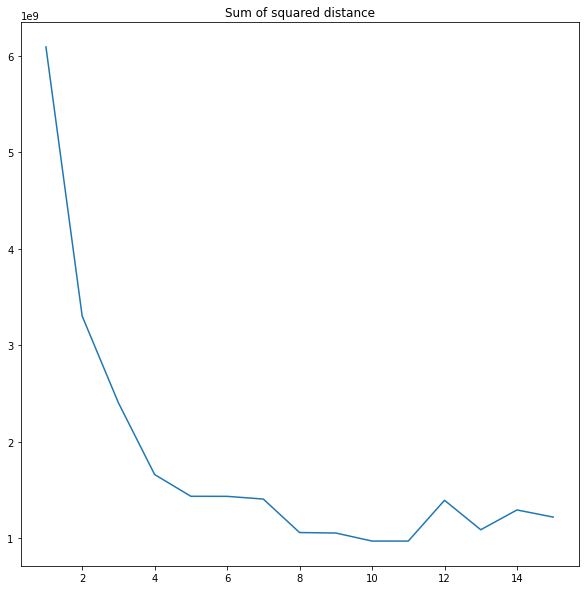

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
plt.plot(ds_error['NumberofCluster'], ds_error['Error'])
plt.title('Sum of squared distance')

In [56]:
clus = KMedoids(11)
clus.fit(inventory[['contract_year', 'price', 'release_year', 'runtime', 'imdb_score',
                       'votes', 'reviews_users', 'reviews_critics', 'budget', 'theater_opening',
                       'theater_total',
                       'contract_price', 'studio_num', 'country_num', 'director_num', 'genre_num']])

cluster_kmeans = [i+1 for i in clus.labels_]
inventory["ClusterKmeans"] = cluster_kmeans
inventory.head()

,Unnamed: 0,item_id,contract_year,movie_id,title,price,release_year,release_date,runtime,mpa_rating,...,actor_2,actor_3,contract_price,studio_score,price_class,studio_num,country_num,director_num,genre_num,ClusterKmeans
0,0,I-1001,2015,tt0121766,Star Wars: Episode III - Revenge of the Sith,5500.0,2005,05-19-2005,140,PG-13,...,Natalie Portman,Hayden Christensen,2700,10,10,0,0,0,0,10
1,20,I-1021,2015,tt0499549,Avatar,4000.0,2009,12-18-2009,162,PG-13,...,Zoe Saldana,Sigourney Weaver,2700,10,10,0,0,17,0,7
2,37,I-1038,2015,tt1951264,The Hunger Games: Catching Fire,1000.0,2013,11-22-2013,146,PG-13,...,Liam Hemsworth,Jack Quaid,2600,6,10,8,0,8,0,8
3,42,I-1043,2015,tt1951265,The Hunger Games: Mockingjay - Part 1,1200.0,2014,11-21-2014,123,PG-13,...,Josh Hutcherson,Liam Hemsworth,2195,6,1,8,0,8,0,8
4,63,I-1064,2016,tt1951266,The Hunger Games: Mockingjay - Part 2,1000.0,2015,11-20-2015,137,PG-13,...,Josh Hutcherson,Liam Hemsworth,2195,6,1,8,0,8,0,3


In [57]:
inventory.to_csv('movie_inventory2.csv')

In [67]:
inventory.head()

,Unnamed: 0,item_id,contract_year,movie_id,title,price,release_year,release_date,runtime,mpa_rating,...,director,Genre_1,Genre_2,Genre_3,actor_1,actor_2,actor_3,contract_price,studio_score,price_class
0,0,I-1001,2015,tt0121766,Star Wars: Episode III - Revenge of the Sith,5500.0,2005,05-19-2005,140,PG-13,...,George Lucas,Action,Adventure,Fantasy,Ewan McGregor,Natalie Portman,Hayden Christensen,2700,10,10
1,1,I-1002,2015,tt0330373,Harry Potter and the Goblet of Fire,4500.0,2005,11-18-2005,157,PG-13,...,Mike Newell,Adventure,Family,Fantasy,Eric Sykes,Timothy Spall,David Tennant,2700,10,10
2,2,I-1003,2015,tt0363771,"The Chronicles of Narnia: The Lion, the Witc",5500.0,2005,12-09-2005,143,PG,...,Andrew Adamson,Adventure,Family,Fantasy,Georgie Henley,Skandar Keynes,William Moseley,2295,10,1
3,3,I-1004,2015,tt0383574,Pirates of the Caribbean: Dead Man's Chest,5500.0,2006,07-07-2006,151,PG-13,...,Gore Verbinski,Action,Adventure,Fantasy,Johnny Depp,Orlando Bloom,Keira Knightley,2295,10,1
4,4,I-1005,2015,tt0413300,Spider-Man 3,4000.0,2007,05-04-2007,139,PG-13,...,Sam Raimi,Action,Adventure,Sci-Fi,Tobey Maguire,Kirsten Dunst,James Franco,2295,10,1
